<a href="https://colab.research.google.com/github/apchavezr/Fundamentos-de-Estad-stica---Ciencia-de-Datos/blob/main/PCA_Wine_Ejercicio_Explicado_Interpretado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Componentes Principales (PCA) con el conjunto de datos Wine
Este notebook presenta un ejemplo práctico y comentado del uso de PCA sobre el conjunto de datos `Wine`, disponible en la biblioteca `scikit-learn`. Incluye:
- Carga y estandarización de los datos.
- Aplicación de PCA con 2 componentes principales.
- Visualización de los resultados proyectados.
- Cálculo e interpretación de la varianza explicada acumulada para decidir cuántos componentes conservar.


In [1]:
# Importación de bibliotecas necesarias
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Carga y estandarización de los datos
Primero, cargamos el conjunto de datos `Wine`, que contiene mediciones químicas de vinos de tres clases diferentes. Luego estandarizamos las variables para que todas tengan media cero y desviación estándar uno, dado que PCA es sensible a la escala de los datos.

In [2]:
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

## 2. Aplicación de PCA con 2 componentes principales
Aplicamos PCA para reducir el conjunto de datos a dos dimensiones. Esto permite visualizar las observaciones en un plano bidimensional donde cada eje corresponde a un componente principal que captura la máxima varianza de los datos.

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## 3. Visualización de los datos proyectados
Se construye un DataFrame con las dos componentes principales y las etiquetas de clase. Luego se realiza una visualización en dispersión para observar cómo se agrupan las observaciones.

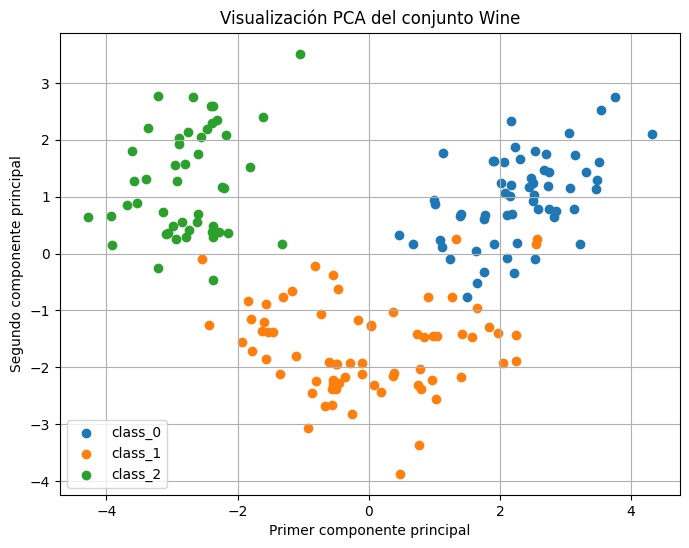

In [4]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

plt.figure(figsize=(8,6))
for label in df_pca['target'].unique():
    subset = df_pca[df_pca['target'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=data.target_names[label])
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('Visualización PCA del conjunto Wine')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación de la proyección PCA
En el gráfico anterior se observa cómo las observaciones se agrupan en el plano definido por las dos primeras componentes principales. Cada color representa una de las clases de vino. La separación entre grupos indica que estas dos componentes retienen información relevante para diferenciar las clases. Si las clases estuvieran completamente mezcladas, el PCA no estaría ayudando a diferenciar patrones entre ellas.

## 4. Análisis de la varianza explicada acumulada
Calculamos la proporción de varianza explicada por cada componente principal y graficamos su acumulado para ayudar a decidir cuántos componentes conservar. Se recomienda conservar suficientes componentes como para explicar al menos el 90% de la varianza total.

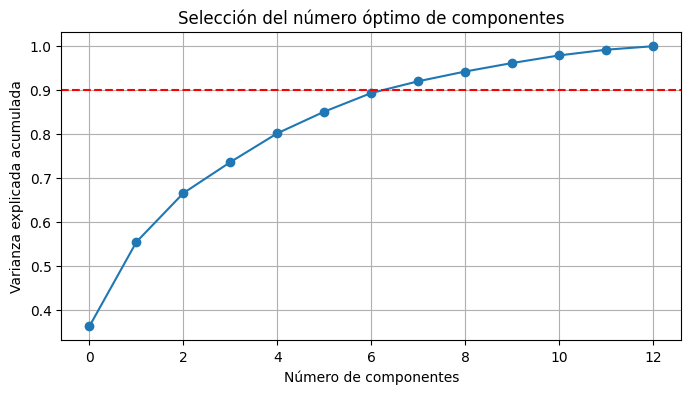

In [5]:
pca_full = PCA().fit(X)
varianza = pca_full.explained_variance_ratio_
acumulada = np.cumsum(varianza)

plt.figure(figsize=(8,4))
plt.plot(acumulada, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Selección del número óptimo de componentes')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.grid(True)
plt.show()

### Interpretación de la varianza explicada acumulada
La curva muestra cómo se acumula la varianza explicada al aumentar el número de componentes. En este ejemplo, se observa que con aproximadamente 6 o 7 componentes se alcanza un umbral del 90% de varianza explicada, lo cual justifica reducir la dimensionalidad del conjunto de datos original de 13 a menos de la mitad sin perder demasiada información. Este análisis es clave para balancear entre simplicidad y retención de información.

## Conclusiones
- El Análisis de Componentes Principales (PCA) permite identificar patrones en los datos y reducir la dimensionalidad de forma efectiva.
- La estandarización previa es un paso obligatorio, ya que PCA es sensible a la escala de los datos.
- La visualización de las primeras componentes puede revelar agrupamientos naturales entre observaciones, útil en análisis exploratorios.
- El gráfico de varianza explicada acumulada es una herramienta útil para decidir cuántos componentes retener con base en criterios estadísticos y no arbitrarios.
- En el caso del conjunto de datos Wine, dos componentes permiten una visualización efectiva, pero se requieren entre 6 y 7 componentes para capturar el 90% de la varianza total.